In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

import tensorflow.keras as keras
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
datagen=ImageDataGenerator()

In [4]:
class_names=[]
directory_path =r"S:\Adacamic Projects\data\Orgran Injury\nose\train"
file_names = os.listdir(directory_path)
for file_name in file_names:
    class_names.append(file_name)
    print(file_name)

Broken nose
Deviated Septum
epistaxis or nose bleeding
Nasal furuncles
Nasal granuloma
Nasal hematoma
Nasal herpes simplex
Nasal Polyps
Nasal Ulcers
Nasal vestibulitis


In [5]:
train_generator = datagen.flow_from_directory( 
    directory=r"S:\Adacamic Projects\data\Orgran Injury\nose\train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="sparse", 
)

Found 348 images belonging to 10 classes.


In [6]:
valid_generator = datagen.flow_from_directory( 
    directory=r"S:\Adacamic Projects\data\Orgran Injury\nose\validation", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="sparse", 
)

Found 85 images belonging to 10 classes.


In [7]:
test_generator = datagen.flow_from_directory( 
    directory=r"S:\Adacamic Projects\data\Orgran Injury\nose\test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="sparse", 
)

Found 71 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [10]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 

predictions = layers.Dense(len(class_names), activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [11]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    history = model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)
    

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    los = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, epochs + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, los, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


    return history



Epoch 1/10
11/11 [==============================] - 14s 1s/step - loss: 0.8145 - accuracy: 0.6782 - val_loss: 2.1242 - val_accuracy: 0.4353
Epoch 2/10
11/11 [==============================] - 10s 921ms/step - loss: 0.7485 - accuracy: 0.7098 - val_loss: 2.2315 - val_accuracy: 0.4235
Epoch 3/10
11/11 [==============================] - 10s 907ms/step - loss: 0.7138 - accuracy: 0.7184 - val_loss: 2.0971 - val_accuracy: 0.4471
Epoch 4/10
11/11 [==============================] - 10s 916ms/step - loss: 0.6760 - accuracy: 0.7443 - val_loss: 1.9363 - val_accuracy: 0.4588
Epoch 5/10
11/11 [==============================] - 10s 911ms/step - loss: 0.6622 - accuracy: 0.7443 - val_loss: 1.8379 - val_accuracy: 0.4706
Epoch 6/10
11/11 [==============================] - 10s 901ms/step - loss: 0.5678 - accuracy: 0.8017 - val_loss: 2.4002 - val_accuracy: 0.4471
Epoch 7/10
11/11 [==============================] - 10s 908ms/step - loss: 0.5368 - accuracy: 0.8046 - val_loss: 2.1639 - val_accuracy: 0.4235
Ep

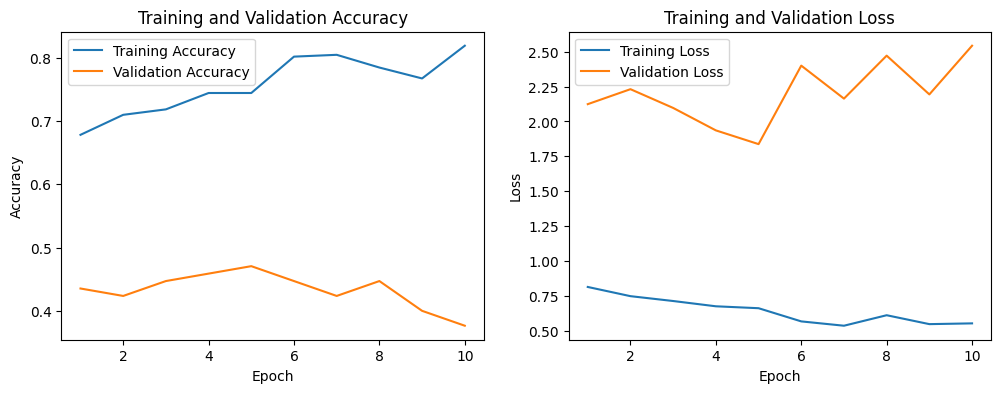

In [29]:
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

In [14]:
model.save(r"S:\Adacamic Projects\Project 2\keras Models\nose1.h5")

C:\Users\S R SURJIT KUMAR\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
from keras.models import load_model

model_path = r"S:\Adacamic Projects\Project 2\keras Models\nose1.h5"
model = load_model(model_path)
img = tf.keras.preprocessing.image.load_img(r"S:\Adacamic Projects\data\Orgran Injury\nose\train\Nasal herpes simplex\NHS50.png", target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 1s 810ms/step
[[3.3883348e-03 8.9599474e-05 1.6631350e-02 3.0920668e-02 5.1847086e-03
  3.0211519e-04 8.7097186e-01 1.2052300e-03 5.7859350e-02 1.3446699e-02]]


In [28]:
class_id = np.argmax(predictions, axis = 1)
print(class_id)
class_names[class_id.item()]

[6]


'Nasal herpes simplex'